Système à quatre niveaux --- Partie 2

In [4]:
# Tout d'abord, les bibliothèques de fonctions sont chargées
import matplotlib.pyplot as plt # importer le module Matplotlib comme "plt"
import numpy as np # importer le module NumPy comme "np"
import sys
from matplotlib import rc # Permet l'utilisation de LateX dans les
#legendes des figures

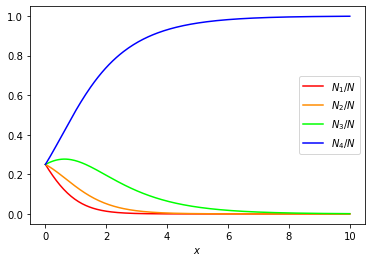

In [12]:
# Nous refaisons le calcul avec cette fois-ci quatre niveaux équidistants.
# Les quatre niveaux d'énergie sont -E_0, -E_0/3, +E_0/3, +E_0

# En premier lieu, traçons les populations N_1, N_2, N_3 et N_4 correspondantes.
# x = beta x E_0 .
# La commande suivante génère une série de x qui serviront à définir l'axe des abscisses>
x = np.linspace(0, 10, 250)
# Puisque l'ordinateur travaille avec des variables adimensionnées, il est préférable
# de travailler avec N_1/N, N_2/N, N_3/N et N_4/N.

# À partir de trois niveaux, il est utile de définir la fonction de partition comme une fonction.
def Z(x):
    return np.exp(x) + np.exp(x/3) + np.exp(-x/3) + np.exp(-x)

fig, ax = plt.subplots()
plt.plot(x, np.exp(-x)/Z(x), color = 'red', label = r'$N_1/N$')
plt.plot(x, np.exp(-x/3)/Z(x), color = 'darkorange', label = r'$N_2/N$')
plt.plot(x, np.exp(x/3)/Z(x), color = 'lime', label = r'$N_3/N$')
plt.plot(x, np.exp(x)/Z(x), color = 'blue', label = r'$N_4/N$')
ax.legend()
plt.xlabel(r'$x$')
plt.show()

In [6]:
# De nouveau, à basse température, seul le niveau fondamental est excité, et à la limite des très hautes
# températures, x→0, tous les niveaux d'énergie deviennent équiprobables.

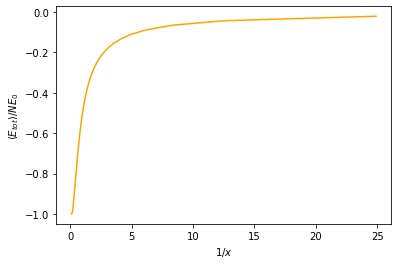

In [13]:
# Nous pouvons à partir de ces résultats tracer l'évolution de l'énergie moyenne (adimensionnée)
# en fonction de x.

# Nous devons enlever 0 pour éviter de faire diverger la première valeur.
x = np.linspace(0, 10, 250)
x = np.delete(x, 0)

def energie(x):
    # C'est un bon exercice de retrouver ce résultat par le calcul.
    # La quantité tracée est toujours <E_tot>/N E_0
    return -1/Z(x)*(-np.exp(-x) -1/3*np.exp(-x/3) + 1/3*np.exp(x/3) + np.exp(x))

fig, ax = plt.subplots()
plt.plot(1/x, energie(x),color = 'orange')
plt.xlabel(r'$1/x$')
plt.ylabel(r'$\left<E_{tot}\right>/NE_0$')
plt.show()

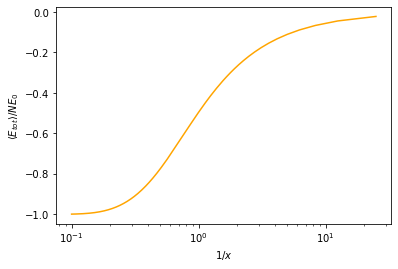

In [14]:
# Pour mieux voir les variations, nous retraçons le graphe en échelle log.

fig, ax = plt.subplots()
plt.semilogx(1/x, energie(x),color = 'orange')
plt.xlabel(r'$1/x$')
plt.ylabel(r'$\left<E_{tot}\right>/NE_0$')
plt.show()

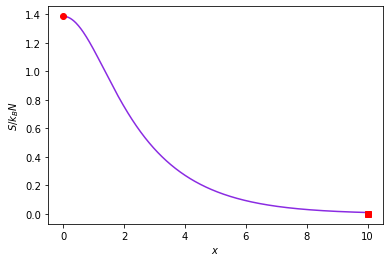

In [9]:
# Nous traçons ici l'entropie, ou plus précisément S/k_BN
# Cette fois-ci, elle est exprimée en fonction de x, et non xi
# Comme l'expression de cette fonction est plus compliquée, il est préférable de la définir en tant que fonction.

def entropie(x):
    # Exercice intéressant : retrouver cette formule de l'entropie.
    return -1/Z(x)*(np.exp(x)*np.log(np.exp(x)/Z(x)) + np.exp(x/3)*np.log(np.exp(x/3)/Z(x)) + \
                    np.exp(-x/3)*np.log(np.exp(-x/3)/Z(x)) + np.exp(-x)*np.log(np.exp(-x)/Z(x)))

# Nous créons une liste de valeurs régulièrement espacées entre 0 et 10
x = np.linspace(0, 10, 500)

# Nous traçons l'entropie et faisons apparaître les points remarquables
fig, ax = plt.subplots()
plt.plot(x, entropie(x),color = 'blueviolet')
plt.plot(0, np.log(4), 'ro')
plt.plot(10, 0, 'rs')
plt.xlabel(r'$x$')
plt.ylabel(r'$S/k_BN$')
plt.show()

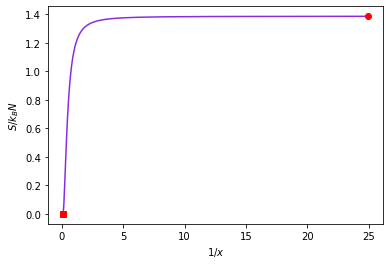

In [10]:
# Nous traçons à présent l'entropie en fonction de la température.

# Nous devons enlever 0 pour éviter de faire diverger la première valeur.
x = np.linspace(0, 10, 250)
x = np.delete(x, 0)

fig, ax = plt.subplots()
plt.plot(1/x, entropie(x), color = 'blueviolet')
plt.plot(24.9, np.log(4), 'ro')
plt.plot(0.1, 0, 'rs')
plt.xlabel(r'$1/x$')
plt.ylabel(r'$S/k_BN$')
plt.show()

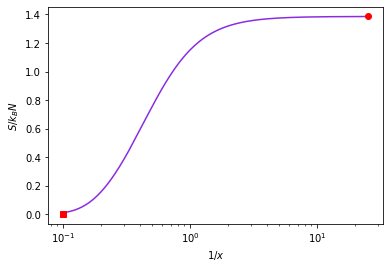

In [11]:
# Étant donné les séparations d'échelle, il est préférable de tracer ce graphique en échelle logarithmique afin
# de mieux apprécier les variations de S.

fig, ax = plt.subplots()
plt.plot(1/x, entropie(x), color = 'blueviolet')
plt.semilogx(24.9, np.log(4), 'ro')
plt.plot(0.1, 0, 'rs')
plt.xlabel(r'$1/x$')
plt.ylabel(r'$S/k_BN$')
plt.show()